Customization of the pretrained model to develop a new model and compare the models in terms of accuracy and inference time.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import MobileNetV2

import time

In [2]:
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

170498071/170498071 [==============================] - 3s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## VGG16

In [24]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [25]:
x= vgg_model.output
outlayer= Dense(10, activation= 'softmax')(x)
#outlayer= Flatten()(outlayer)
model1= keras.Model(inputs=vgg_model.input, outputs= outlayer)

In [29]:
# for layer in vgg_model.layers:
#      layer.trainable = False

# this code chunk resulted in lower accuracy so I commented it out~

In [27]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [28]:
start= time.time()
history_v= model1.fit(x_train, y_train, batch_size= 256, epochs=10, verbose=1,validation_data=(x_test, y_test))
v_time= time.time()- start

Epoch 1/10
196/196 [==============================] - 23s 100ms/step - loss: 1.9475 - accuracy: 0.2341 - val_loss: 1.5808 - val_accuracy: 0.3688
Epoch 2/10
196/196 [==============================] - 19s 97ms/step - loss: 1.2461 - accuracy: 0.5298 - val_loss: 1.0972 - val_accuracy: 0.6252
Epoch 3/10
196/196 [==============================] - 19s 98ms/step - loss: 0.8746 - accuracy: 0.6944 - val_loss: 0.7719 - val_accuracy: 0.7376
Epoch 4/10
196/196 [==============================] - 19s 96ms/step - loss: 0.6697 - accuracy: 0.7721 - val_loss: 0.6836 - val_accuracy: 0.7713
Epoch 5/10
196/196 [==============================] - 19s 96ms/step - loss: 0.5308 - accuracy: 0.8216 - val_loss: 0.6780 - val_accuracy: 0.7777
Epoch 6/10
196/196 [==============================] - 19s 96ms/step - loss: 0.4374 - accuracy: 0.8535 - val_loss: 0.6368 - val_accuracy: 0.7985
Epoch 7/10
196/196 [==============================] - 20s 100ms/step - loss: 0.3650 - accuracy: 0.8782 - val_loss: 0.6662 - val_accurac

## ResNet50

In [30]:
r50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [31]:
x= r50_model.output
reslayer= Dense(10, activation= 'softmax')(x)
reslayer= Flatten()(reslayer)
model2= keras.Model(inputs=r50_model.input, outputs= reslayer)

# for layer in r50_model.layers:
#      layer.trainable = False

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

In [32]:
start= time.time()
history_r= model2.fit(x_train, y_train, batch_size= 256, epochs=10, verbose=1,validation_data=(x_test, y_test))
r_time= time.time()- start

Epoch 1/10
196/196 [==============================] - 30s 114ms/step - loss: 1.3345 - accuracy: 0.5806 - val_loss: 3.2648 - val_accuracy: 0.1048
Epoch 2/10
196/196 [==============================] - 19s 97ms/step - loss: 1.0608 - accuracy: 0.6516 - val_loss: 3.6814 - val_accuracy: 0.1000
Epoch 3/10
196/196 [==============================] - 19s 96ms/step - loss: 0.9198 - accuracy: 0.6946 - val_loss: 2.8233 - val_accuracy: 0.1164
Epoch 4/10
196/196 [==============================] - 19s 96ms/step - loss: 1.1316 - accuracy: 0.6287 - val_loss: 2.6736 - val_accuracy: 0.2932
Epoch 5/10
196/196 [==============================] - 19s 95ms/step - loss: 0.9339 - accuracy: 0.6977 - val_loss: 1.1168 - val_accuracy: 0.6130
Epoch 6/10
196/196 [==============================] - 19s 96ms/step - loss: 0.8280 - accuracy: 0.7265 - val_loss: 1.3059 - val_accuracy: 0.5516
Epoch 7/10
196/196 [==============================] - 19s 98ms/step - loss: 0.7033 - accuracy: 0.7545 - val_loss: 0.8189 - val_accuracy

## MobileNetV2

In [36]:
mn_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x= mn_model.output
mnlayer= Dense(10, activation= 'softmax')(x)
mnlayer= Flatten()(mnlayer)
model3= keras.Model(inputs=mn_model.input, outputs= mnlayer)

# for layer in mn_model.layers:
#      layer.trainable = False

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 16, 16, 32)   864         ['input_7[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 16, 16, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 16, 16, 32)   0           ['bn_Conv1[0][0]']               
                                                                                            

In [37]:
start= time.time()
history_m= model3.fit(x_train, y_train, batch_size= 256, epochs=10, verbose=1,validation_data=(x_test, y_test))
m_time= time.time()- start

Epoch 1/10
196/196 [==============================] - 13s 43ms/step - loss: 1.2949 - accuracy: 0.5643 - val_loss: 10.3886 - val_accuracy: 0.1241
Epoch 2/10
196/196 [==============================] - 7s 38ms/step - loss: 0.7920 - accuracy: 0.7265 - val_loss: 13.2005 - val_accuracy: 0.1200
Epoch 3/10
196/196 [==============================] - 8s 38ms/step - loss: 0.6321 - accuracy: 0.7836 - val_loss: 12.1790 - val_accuracy: 0.1262
Epoch 4/10
196/196 [==============================] - 8s 38ms/step - loss: 0.5101 - accuracy: 0.8231 - val_loss: 11.0243 - val_accuracy: 0.1522
Epoch 5/10
196/196 [==============================] - 7s 38ms/step - loss: 0.4342 - accuracy: 0.8473 - val_loss: 7.7352 - val_accuracy: 0.2378
Epoch 6/10
196/196 [==============================] - 7s 38ms/step - loss: 0.4290 - accuracy: 0.8512 - val_loss: 7.1904 - val_accuracy: 0.3436
Epoch 7/10
196/196 [==============================] - 9s 44ms/step - loss: 0.3654 - accuracy: 0.8720 - val_loss: 6.5976 - val_accuracy: 0

## Comparison

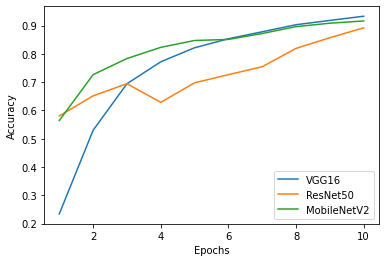

In [38]:
eps= [i for i in range(1, 11)]
plt.plot(eps, history_v.history['accuracy'], label= "VGG16")
plt.plot(eps, history_r.history['accuracy'], label= "ResNet50")
plt.plot(eps, history_m.history['accuracy'], label= "MobileNetV2")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

VGG16 time: 203.6918032169342
ResNet50 time:  199.95595502853394
MobileNetV2 time:  83.27598404884338


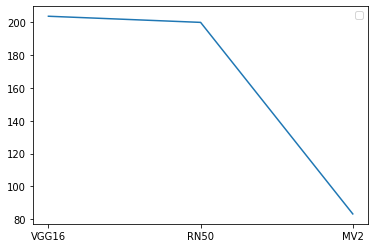

In [39]:
print("VGG16 time:", v_time)
print("ResNet50 time: ", r_time)
print("MobileNetV2 time: ", m_time)

mods= ["VGG16", "RN50", "MV2"]
timey= [v_time, r_time, m_time]
plt.plot(mods, timey)
plt.legend()
plt.show()